In [ ]:
!unzip /content/drive/MyDrive/Datasets/PRSA2017_Data_20130301-20170228.zip -d /content

Archive:  /content/drive/MyDrive/Datasets/PRSA2017_Data_20130301-20170228.zip
   creating: /content/PRSA2017_Data_20130301-20170228/PRSA_Data_20130301-20170228/
  inflating: /content/PRSA2017_Data_20130301-20170228/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv  
  inflating: /content/PRSA2017_Data_20130301-20170228/PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv  
  inflating: /content/PRSA2017_Data_20130301-20170228/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv  
  inflating: /content/PRSA2017_Data_20130301-20170228/PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv  
  inflating: /content/PRSA2017_Data_20130301-20170228/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv  
  inflating: /content/PRSA2017_Data_20130301-20170228/PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv  
  inflating: /content/PRSA2017_Data_20130301-20170228/PRSA_Data_20130301-20170228/PRSA_

***OPENING DATASET & CHECKING FOR NULL DATA***

In [ ]:
import os
import pandas as pd
import seaborn as sns
from joblib import dump
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

path = "/content/PRSA2017_Data_20130301-20170228/PRSA_Data_20130301-20170228"
dict_of_dfs = dict()

for add in os.listdir(path= path):
        dict_of_dfs[add.split("_")[2]] = pd.read_csv(path+"/" +add , parse_dates={"date" : ["year","month" ,"day" , "hour"]  }  , index_col= "date" , date_parser=lambda x: datetime.strptime(x, '%Y %m %d %H') )

print(dict_of_dfs["Aotizhongxin"].head())
print('\n')
print(dict_of_dfs["Aotizhongxin"].isna().sum())

                     No  PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  \
date                                                                          
2013-03-01 00:00:00   1    4.0   4.0   4.0   7.0  300.0  77.0  -0.7  1023.0   
2013-03-01 01:00:00   2    8.0   8.0   4.0   7.0  300.0  77.0  -1.1  1023.2   
2013-03-01 02:00:00   3    7.0   7.0   5.0  10.0  300.0  73.0  -1.1  1023.5   
2013-03-01 03:00:00   4    6.0   6.0  11.0  11.0  300.0  72.0  -1.4  1024.5   
2013-03-01 04:00:00   5    3.0   3.0  12.0  12.0  300.0  72.0  -2.0  1025.2   

                     DEWP  RAIN   wd  WSPM       station  
date                                                      
2013-03-01 00:00:00 -18.8   0.0  NNW   4.4  Aotizhongxin  
2013-03-01 01:00:00 -18.2   0.0    N   4.7  Aotizhongxin  
2013-03-01 02:00:00 -18.2   0.0  NNW   5.6  Aotizhongxin  
2013-03-01 03:00:00 -19.4   0.0   NW   3.1  Aotizhongxin  
2013-03-01 04:00:00 -19.5   0.0    N   2.0  Aotizhongxin  


No            0
PM2.5       925

***LINEAR INTERPOLATION OF THE NULL DATA IN DATAFRAME***

In [ ]:
for city in dict_of_dfs.keys():
    dict_of_dfs[city] = dict_of_dfs[city].interpolate("time")

dict_of_dfs["Aotizhongxin"].isna().sum()

No          0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd         81
WSPM        0
station     0
dtype: int64

***CONVERSION OF THE "WD" COLUMN INTO DEGREE***

In [ ]:
wd_encoding = {"N" : 0,  "NNE" : 22.5,  "NE" : 45,  "ENE" : 67.5,
               "E" : 90, "ESE" : 112.5, "SE" : 135, "SSE" : 157.5,
               "S" : 180,"SSW" : 202.5, "SW" : 225, "WSW" : 247.5,
               "W" : 270,"WNW" : 292.5, "NW" : 315, "NNW" : 337.5 }

for city in dict_of_dfs.keys():
    dict_of_dfs[city]["wd"] = dict_of_dfs[city]["wd"].map(wd_encoding)

***CHECKING AGAIN FOR UNDESIRED DATA***

In [ ]:
for city in dict_of_dfs.keys():
    dict_of_dfs[city].interpolate("time" , inplace = True)

dict_of_dfs["Aotizhongxin"].isna().sum()

No         0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [ ]:
dict_of_dfs["Aotizhongxin"].head()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
date,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,337.5,4.4,Aotizhongxin
2013-03-01 01:00:00,2,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,0.0,4.7,Aotizhongxin
2013-03-01 02:00:00,3,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,337.5,5.6,Aotizhongxin
2013-03-01 03:00:00,4,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,315.0,3.1,Aotizhongxin
2013-03-01 04:00:00,5,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,0.0,2.0,Aotizhongxin


***SCALING THE DATAFRAME USING MIN MAX SCALER***

In [ ]:
scaler = MinMaxScaler()
PMS_df = pd.DataFrame()

for city in dict_of_dfs.keys():
    temp = pd.DataFrame(dict_of_dfs[city]["PM2.5"])
    temp.columns = ["PM2.5" + " " + city[:4]]
    PMS_df = pd.concat((PMS_df,temp),axis=1)

PMS_df.head()

,PM2.5 Guch,PM2.5 Tian,PM2.5 Dong,PM2.5 Guan,PM2.5 Nong,PM2.5 Wanl,PM2.5 Ding,PM2.5 Shun,PM2.5 Chan,PM2.5 Aoti,PM2.5 Huai,PM2.5 Wans
date,,,,,,,,,,,,
2013-03-01 00:00:00,6.0,6.0,9.0,4.0,5.0,8.0,4.0,3.0,3.0,4.0,7.0,9.0
2013-03-01 01:00:00,6.0,6.0,4.0,4.0,8.0,9.0,7.0,12.0,3.0,8.0,4.0,11.0
2013-03-01 02:00:00,5.0,6.0,7.0,3.0,3.0,3.0,5.0,14.0,3.0,7.0,4.0,8.0
2013-03-01 03:00:00,6.0,6.0,3.0,3.0,5.0,11.0,6.0,12.0,3.0,6.0,3.0,8.0
2013-03-01 04:00:00,5.0,5.0,3.0,3.0,5.0,3.0,5.0,12.0,3.0,3.0,3.0,8.0


***TRAIN TEST SPLITTING OF THE SCALED FEATURES***

In [ ]:
PMS_df.drop("PM2.5 Aoti" , axis=1 , inplace = True)
rows , cols = dict_of_dfs["Aotizhongxin"].shape

index_80_percent = int(rows*0.8)

other_features = dict_of_dfs["Aotizhongxin"].drop(["No","O3" ,"NO2","SO2","PM2.5" , "station"], axis=1)

Features = pd.concat((PMS_df ,other_features ), axis=1)
Features_df_Train_set = Features.iloc[: index_80_percent]
Features_df_Test_set = Features.iloc[index_80_percent :]

print(Features_df_Train_set)

                     PM2.5 Guch  PM2.5 Tian  PM2.5 Dong  PM2.5 Guan  \
date                                                                  
2013-03-01 00:00:00         6.0         6.0         9.0         4.0   
2013-03-01 01:00:00         6.0         6.0         4.0         4.0   
2013-03-01 02:00:00         5.0         6.0         7.0         3.0   
2013-03-01 03:00:00         6.0         6.0         3.0         3.0   
2013-03-01 04:00:00         5.0         5.0         3.0         3.0   
...                         ...         ...         ...         ...   
2016-05-12 14:00:00        22.0        21.0        27.0        20.0   
2016-05-12 15:00:00        21.0        16.0        19.0        13.0   
2016-05-12 16:00:00        28.0        23.0        19.0        15.0   
2016-05-12 17:00:00        29.0        11.0        19.0         5.0   
2016-05-12 18:00:00        19.0        15.0         3.0        10.0   

                     PM2.5 Nong  PM2.5 Wanl  PM2.5 Ding  PM2.5 Shun  \
date 

***SAVING THE SCALER METADATA FOR FURTHUR INVERSE TRANSFORMATION***

In [ ]:
col_names = Features.columns
dates_train = Features_df_Train_set.index
dates_test = Features_df_Test_set.index
Features_Train_Norm = scaler.fit_transform(Features_df_Train_set)
Features_Test_Norm = scaler.transform(Features_df_Test_set)

Features_Train_Norm_df = pd.DataFrame(Features_Train_Norm)
Features_Train_Norm_df.columns = col_names
Features_Train_Norm_df.set_index(dates_train, inplace=True)

Features_Test_Norm_df = pd.DataFrame(Features_Test_Norm)
Features_Test_Norm_df.columns = col_names
Features_Test_Norm_df.set_index(dates_test, inplace=True)

dump(scaler, 'MinMaxScaler.joblib')

['MinMaxScaler.joblib']

***COMBINING TWO DATAFRAMES AND SAVING THEM INTO TRAIN AND TEST CSV FILES***

In [ ]:
Train_df = pd.concat((Features_Train_Norm_df , dict_of_dfs["Aotizhongxin"]["PM2.5"].loc[dates_train]) , axis=1)
Test_df = pd.concat((Features_Test_Norm_df , dict_of_dfs["Aotizhongxin"]["PM2.5"].loc[dates_test]) , axis=1)

Train_df.to_csv("train.csv" , date_format  = "%Y-%m-%d %H:%M:%S" )
Test_df.to_csv("test.csv" , date_format  = "%Y-%m-%d %H:%M:%S" )

***PEARSON CORRELATION PLOT***

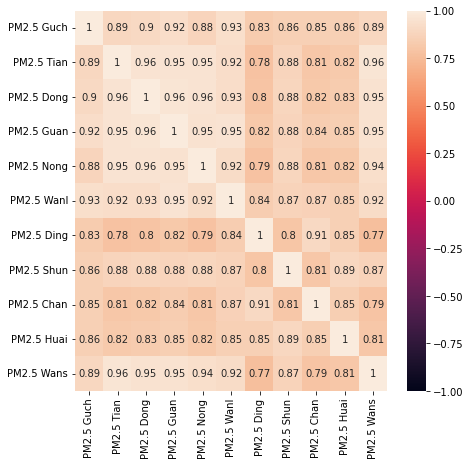

In [ ]:
fig,ax = plt.subplots(1,1,figsize = (7,7))
ax = sns.heatmap(PMS_df.corr(),annot = True,vmax= 1 , vmin=-1)

In [ ]:
import math
import datetime 
import numpy as np
import pandas as pd
from joblib import load
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

!pip install tensorflow-addons==0.16.1
import tensorflow_addons as tfa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 33.4 MB/s 


/usr/local/lib/python3.8/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.9.2 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [ ]:
def tf_dataset(series_x, series_y, batch_size, shuffle_buffer, shuffle=True):
    ds = tf.data.Dataset.from_tensor_slices((series_x, series_y))
    if shuffle:
        ds = ds.cache().shuffle(shuffle_buffer).batch(batch_size).repeat()
    else:
        ds = ds.cache().batch(batch_size).repeat()
    return ds

def create_window_dataset(ds, lb, window_size):
    windowed_dataset = list()
    labels = list()
    for i in range(window_size, ds.shape[0] + 1):
        windowed_dataset.append(ds[i - window_size:i])
        labels.append(lb[i - 1])
    return np.array(windowed_dataset), np.array(labels)

def get_metrics_result(metrics, true_labels, predicted_labels):    
    metrics_result = list()
    for metric in metrics:
        metric.reset_states()
        metric.update_state(true_labels, predicted_labels)
        metrics_result.append(metric.result().numpy())    
    return metrics_result

In [ ]:
Data_set = pd.read_csv("train.csv" , parse_dates= ["date"] , index_col= "date")
Test_set = pd.read_csv("test.csv" , parse_dates= ["date"] , index_col= "date")

len_Data = len(Data_set)
Data_set_np = Data_set.to_numpy()

Train_set_np = Data_set_np[:int(0.8*len_Data)]
Val_set_np =  Data_set_np[int(0.8*len_Data):]
Test_set_np = Test_set.to_numpy()

In [ ]:
BATCH_SIZE = 32
LAG = 7
WINDOW_SIZE = LAG *24
SHUFFLE_BUFFER = 1000

windowed_Train , labels_Train = create_window_dataset(Train_set_np[:,:-1] , Train_set_np[:,-1], window_size=WINDOW_SIZE)
train_set = tf_dataset(windowed_Train, labels_Train, batch_size = BATCH_SIZE,shuffle_buffer = SHUFFLE_BUFFER,shuffle=True)
unshuffled_train_set = tf_dataset(windowed_Train, labels_Train, BATCH_SIZE, BATCH_SIZE, False)

windowed_val , labels_val = create_window_dataset(Val_set_np[:,:-1] , Val_set_np[:,-1],window_size=WINDOW_SIZE)
val_set = tf_dataset(windowed_val, labels_val, batch_size = BATCH_SIZE,shuffle_buffer = SHUFFLE_BUFFER,shuffle=False)

windowed_Test , labels_Test = create_window_dataset(Test_set_np[:,:-1] , Test_set_np[:,-1],window_size=WINDOW_SIZE)
test_set = tf_dataset(windowed_Test, labels_Test, batch_size = BATCH_SIZE,shuffle_buffer = SHUFFLE_BUFFER,shuffle=False)

In [ ]:
tf.keras.backend.clear_session()

def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(filters=64,
                            kernel_size=3,
                            strides=1,
                            padding="causal",
                            activation="relu",
                            input_shape=windowed_Train.shape[-2:]),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv1D(filters=64,
                            kernel_size=3,
                            strides=1,
                            padding="causal",
                            activation="relu"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv1D(filters=32,
                            kernel_size=3,
                            strides=1,
                            padding="causal",
                            activation="relu"),
        tf.keras.layers.MaxPooling1D(pool_size=3),
        tf.keras.layers.LSTM(100, dropout=0.2,return_sequences=True),
        tf.keras.layers.LSTM(50, dropout=0.3,return_sequences=True),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1, activation="relu")
    ])

    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(1e-2,decay_rate=0.9,decay_steps=1000)

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                metrics=['mae' , 'mse'])
    return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 168, 64)           3712      
                                                                 
 batch_normalization (BatchN  (None, 168, 64)          256       
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 168, 64)           12352     
                                                                 
 batch_normalization_1 (Batc  (None, 168, 64)          256       
 hNormalization)                                                 
                                                                 
 conv1d_2 (Conv1D)           (None, 168, 32)           6176      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 56, 32)           0

In [ ]:
TRAIN_STEP = math.ceil(windowed_Train.shape[0] / BATCH_SIZE)
VALIDATION_STEP = math.ceil(windowed_val.shape[0] / BATCH_SIZE)
TEST_STEP = math.ceil( windowed_Test.shape[0] / BATCH_SIZE)
log_dir = "logs_lag_"+str(LAG)
checkpoint_path = "checkpoints_lag_"+str(LAG)+"/cp.ckpt"

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor="loss",
                                                      min_delta=1e-3,
                                                      patience=50,
                                                      verbose=1,
                                                      restore_best_weights=True)

check_point_cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)

In [ ]:
history = model.fit(train_set,
                    epochs=50,
                    steps_per_epoch=TRAIN_STEP,
                    validation_data=val_set,
                    validation_steps=VALIDATION_STEP,
                    verbose=1,
                    callbacks=[early_stopping_cb,check_point_cb,tensorboard_callback])

Epoch 1/50


697/697 [==============================] - ETA: 0s - loss: 3403.4414 - mae: 40.5460 - mse: 3403.4414
Epoch 1: saving model to checkpoints_lag_7/cp.ckpt
697/697 [==============================] - 15s 15ms/step - loss: 3403.4414 - mae: 40.5460 - mse: 3403.4414 - val_loss: 5774.3887 - val_mae: 39.5765 - val_mse: 5774.3887
Epoch 2/50
695/697 [============================>.] - ETA: 0s - loss: 1740.7570 - mae: 27.8267 - mse: 1740.7570
Epoch 2: saving model to checkpoints_lag_7/cp.ckpt
697/697 [==============================] - 9s 13ms/step - loss: 1739.0594 - mae: 27.8066 - mse: 1739.0594 - val_loss: 4510.3672 - val_mae: 38.2908 - val_mse: 4510.3672
Epoch 3/50
695/697 [============================>.] - ETA: 0s - loss: 1333.9104 - mae: 23.9011 - mse: 1333.9104
Epoch 3: saving model to checkpoints_lag_7/cp.ckpt
697/697 [==============================] - 10s 15ms/step - loss: 1332.9181 - mae: 23.8941 - mse: 1332.9181 - val_loss: 3780.1013 - val_mae: 31.3494 - val_mse: 3780.1013
Epoch 4/50
693/6

In [ ]:
history.history.keys()

train_mae = history.history["mae"]
val_mae = history.history["val_mae"]
train_mse = history.history["mse"]
val_mse = history.history["val_mse"]

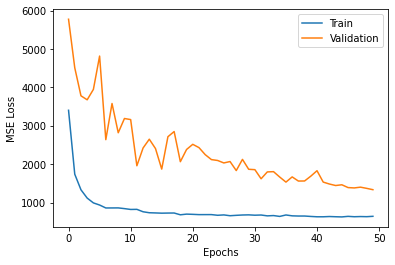

In [ ]:
plt.figure()
plt.plot( train_mse,label = "Train")
plt.plot(val_mse, label = "Validation")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()

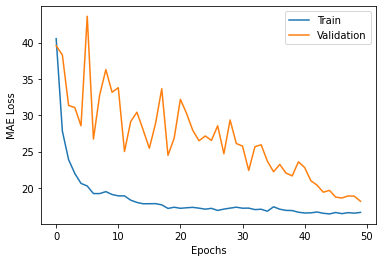

In [ ]:
plt.figure()
plt.plot( train_mae,label = "Train")
plt.plot(val_mae, label = "Validation")
plt.xlabel("Epochs")
plt.ylabel("MAE Loss")
plt.legend()

In [ ]:
model = create_model()
model.load_weights(checkpoint_path)

forecast_test = model.predict(test_set, steps=TEST_STEP, verbose=1)

214/214 [==============================] - 2s 6ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error , r2_score , mean_squared_error

test_MAE = mean_absolute_error(labels_Test, forecast_test)
test_R2 = r2_score(labels_Test, forecast_test)
test_RMSE = mean_squared_error(labels_Test, forecast_test)**0.5

print(f"MAE: {round(test_MAE)}")
print(f"R2: {round(test_R2, 4)}")
print(f"RMSE: {round(test_RMSE, 4)}")

MAE: 14
R2: 0.9111
RMSE: 25.1562
